In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, \
                                auc, roc_curve, confusion_matrix, RocCurveDisplay)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.impute import KNNImputer

In [2]:
# Read train dataset
train_csv = pd.read_csv("./data/train.csv")
train_csv.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Create a new column deck
train_csv["deck"]  = train_csv["Cabin"].str[0]


# Replace all nan values with "M"
train_csv["deck"] = train_csv["deck"].fillna("M") # WHy? because most nan have died and most died are from deck M

# Create a new column surname
train_csv["surname"]  = (train_csv.Name.str.split(",")).str[0]

# Add a column named family size
train_csv["family_size"] = train_csv["SibSp"] + train_csv["Parch"]


In [4]:
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


<AxesSubplot:xlabel='Survived', ylabel='count'>

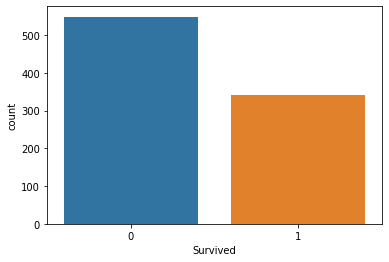

In [5]:
sns.countplot(x=train_csv["Survived"])

In [6]:
# Separate the input and target variables
X =  train_csv.loc[:, train_csv.columns != "Survived"]
X.head(10)

y = train_csv["Survived"] 

In [7]:
# Split data to train and test

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)

In [8]:
Xtrain.shape, ytrain.shape, yval.shape, Xval.shape

((712, 14), (712,), (179,), (179, 14))

In [9]:
Xtrain.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'deck', 'surname',
       'family_size'],
      dtype='object')

# Feature Engineering

In [10]:
# created a pipeline for Age
impute_and_bin = make_pipeline(SimpleImputer(strategy="mean"),  StandardScaler(), KBinsDiscretizer(encode = 'onehot-dense'))


In [11]:
# Store all the fe components 
# Store all the fe components 
fe1 = ColumnTransformer([
    ("ohe_class", OneHotEncoder(sparse=False), ["Pclass"]),
    ("impute_and_bin", impute_and_bin, ["Age"]),
    ("ohe_Sex", OneHotEncoder(sparse=False),["Sex"]),
    ("ohe_deck", make_pipeline(OneHotEncoder(sparse=False), KNNImputer(n_neighbors = 6)),["deck"]),
("ohe_surname", OneHotEncoder(sparse=False, handle_unknown = 'ignore'),["surname"]),
    ("scale_fare", StandardScaler(),["Fare"]),
("scale_size", StandardScaler(),["family_size"])])

fe1

# SimpleImputer(strategy="most_frequent")

ColumnTransformer(transformers=[('ohe_class', OneHotEncoder(sparse=False),
                                 ['Pclass']),
                                ('impute_and_bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['Age']),
                                ('ohe_Sex', OneHotEncoder(sparse=False),
                                 ['Sex']),
                                ('ohe_deck',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse=False)),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=6))]),
                                 ['deck']),
                                ('ohe_surname',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['surname']),
                                ('scale_fare', StandardScaler(), ['Fare']),
                                ('scale_size', StandardScaler(),
                                 ['family_size'])])

In [12]:
# fit the column transformer on the training data
fe1.fit(Xtrain)

/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

ColumnTransformer(transformers=[('ohe_class', OneHotEncoder(sparse=False),
                                 ['Pclass']),
                                ('impute_and_bin',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(encode='onehot-dense'))]),
                                 ['Age']),
                                ('ohe_Sex', OneHotEncoder(sparse=False),
                                 ['Sex']),
                                ('ohe_deck',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse=False)),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=6))]),
                                 ['deck']),
                                ('ohe_surname',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['surname']),
                                ('scale_fare', StandardScaler(), ['Fare']),
                                ('scale_size', StandardScaler(),
                                 ['family_size'])])

In [13]:
# transform the training data
Xtrain_tran = fe1.transform(Xtrain)
Xtrain_tran = pd.DataFrame(Xtrain_tran, columns=fe1.get_feature_names_out())

In [1]:
# def correlation_heatmap(Xtrain_tran):
#     correlations = Xtrain_tran.corr(method = "spearman")
#     fig, ax = plt.subplots(figsize=(15,15))
#     sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
#     plt.show();
# correlation_heatmap(Xtrain_tran)


In [15]:
# initialize the model 
m_lgr = LogisticRegression()
# fit the model on the transformed training data
m_lgr.fit(Xtrain_tran,ytrain)

LogisticRegression()

In [45]:
round(m_lgr.score(Xtrain_tran,ytrain), 2)

0.86

In [17]:
Xval_tran = fe1.transform(Xval)
#pd.DataFrame(Xval_tran, columns=fe1.get_feature_names_out())

In [18]:
m_lgr.score(Xval_tran,yval)

/home/shinde/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8100558659217877

# Balanced

In [19]:
# initialize the model 
m_lgr_bal = LogisticRegression(class_weight = "balanced")
# fit the model on the transformed training data
m_lgr_bal.fit(Xtrain_tran,ytrain)

LogisticRegression(class_weight='balanced')

In [20]:
m_lgr_bal.score(Xtrain_tran,ytrain)

0.8553370786516854

In [21]:
m_lgr_bal.score(Xval_tran,yval)

/home/shinde/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8100558659217877

Area under the curve =  0.88


/home/shinde/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(0.0, 1.05)

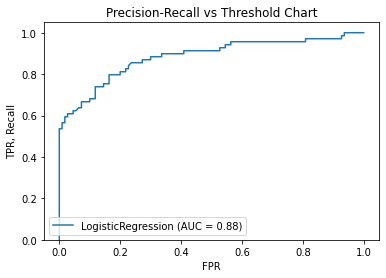

In [23]:
# Plot the ROC curve

probs1 =m_lgr.predict_proba(Xval_tran) 
fpr1, tpr1, threshold = roc_curve(yval,probs1[:,1]);

# Calculating area under the curve, > 0.7 acceptable. Better > 0.8.
auc_score1 = auc(fpr1, tpr1)
print("Area under the curve = ",round(auc_score1, 2))
RocCurveDisplay.from_estimator(m_lgr, Xval_tran, yval)

plt.title("Precision-Recall vs Threshold Chart")
plt.ylabel("TPR, Recall")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.05])

# Random Forest

In [24]:
X_train = Xtrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', "surname", 'deck']]
X_test = Xval[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',"surname", 'deck']]
y_train = ytrain
y_test = yval

In [25]:
y_test.shape, X_train.shape, y_train.shape, X_test.shape

((179,), (712, 7), (712,), (179, 7))

In [26]:
# label encode column Sex
# Store all the fe components 
fe2 = ColumnTransformer([
    ("ohe", OneHotEncoder(sparse=False),["Sex"]),
("ohe_deck", OneHotEncoder(sparse=False),["deck"])])

fe2

ColumnTransformer(transformers=[('ohe', OneHotEncoder(sparse=False), ['Sex']),
                                ('ohe_deck', OneHotEncoder(sparse=False),
                                 ['deck'])])

In [27]:
fe2.fit(X_train)
# transform the training data
Xtrain_tran = fe2.transform(X_train)
Xtrain_tran = pd.DataFrame(Xtrain_tran, columns=fe2.get_feature_names_out())

/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
rf = RandomForestClassifier(n_estimators=40, max_depth=4)


In [29]:
rf.fit(Xtrain_tran, y_train)

RandomForestClassifier(max_depth=4, n_estimators=40)

In [30]:
rf.score(Xtrain_tran,y_train)

0.7865168539325843

In [31]:
# transform the training data
X_test_tran = fe2.transform(X_test)
X_test_tran = pd.DataFrame(X_test_tran, columns=fe2.get_feature_names_out())

In [32]:
rf.score(X_test_tran,y_test)

0.7877094972067039

In [33]:
# # Building the model together with feature engeenering
one_go_mlr3 = make_pipeline(fe2, rf)
one_go_mlr3

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex']),
                                                 ('ohe_deck',
                                                  OneHotEncoder(sparse=False),
                                                  ['deck'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=40))])

In [34]:
one_go_mlr3.fit(X_train, y_train)

/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(sparse=False),
                                                  ['Sex']),
                                                 ('ohe_deck',
                                                  OneHotEncoder(sparse=False),
                                                  ['deck'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, n_estimators=40))])

In [35]:
one_go_mlr3.score(X_train,y_train)

0.7865168539325843

In [36]:
one_go_mlr3.score(X_test,y_test)

0.7877094972067039

# With Logistic feature Engineering

In [37]:
X_train = Xtrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', "family_size", "surname", 'deck', "Fare"]]
X_test = Xval[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',"family_size", "surname", 'deck', "Fare"]]
y_train = ytrain
y_test = yval

In [38]:
fe1.fit(X_train)
# transform the training data
Xtrain_tran = fe1.transform(X_train)
Xtrain_tran = pd.DataFrame(Xtrain_tran, columns=fe1.get_feature_names_out())

/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/shinde/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will

In [39]:
rf = RandomForestClassifier(n_estimators=40, max_depth=4)


In [40]:
rf.fit(Xtrain_tran, y_train)

RandomForestClassifier(max_depth=4, n_estimators=40)

In [41]:
rf.score(Xtrain_tran,y_train)

0.7837078651685393

In [42]:
# transform the training data
X_test_tran = fe1.transform(X_test)
X_test_tran = pd.DataFrame(X_test_tran, columns=fe1.get_feature_names_out())

In [43]:
rf.score(X_test_tran,y_test)

0.7932960893854749

Area under the curve =  0.84


(0.0, 1.05)

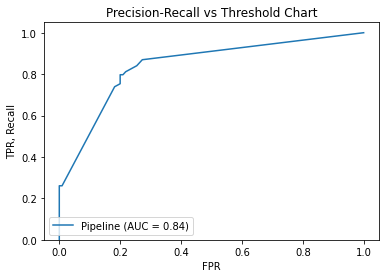

In [44]:
probs3 =one_go_mlr3.predict_proba(X_test) 
fpr3, tpr3, threshold = roc_curve(y_test,probs3[:,1]);

# Calculating area under the curve, > 0.7 acceptable. Better > 0.8.
auc_score3 = auc(fpr3, tpr3)
print("Area under the curve = ",round(auc_score3, 2))

 
RocCurveDisplay.from_estimator(one_go_mlr3, X_test, y_test)



plt.title("Precision-Recall vs Threshold Chart")
plt.ylabel("TPR, Recall")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.05])